In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from netCDF4 import Dataset
import numpy as np
import time
import scipy.signal as sig
import comp_zlevs as zlev


In [5]:
simul = 'luckyto'
path_base = '/net/krypton/data0/project/vortex/lahaye/luckyto_vslab_ridge/'
path_read = path_base+'luckyto_vslab_ridge.nc'
#path_grd = '/net/ruchba/local/tmp/2/lahaye/prep_LUCKYTO/lucky_grd.nc'
#path_strat = '/net/ruchba/local/tmp/2/lahaye/prep_LUCKYTO/strat_profile.nc'

dt = 1.0
Nz = 80

In [6]:
nc = Dataset(path_read,"r")
nt = nc.dimensions["time"].size
ncvar = nc.variables
zr = ncvar["z_rho"][0,:,:]
zw = ncvar["z_w"][0,:,:]
xx = ncvar["lslab"][:]
pbar = ncvar["pbar"][:]
pp = ncvar["pres"][:]
ww = ncvar["w"][:]
nc.close()

#Cs_r, Cs_w = zlev.get_scoord(300, 6, 4, 80)
#zeta = zlev.zlev_rho(topo,zeta,hc,Cs_r,slevs=Nz)
tt = np.arange(nt)*dt
topo = zw[:,0]

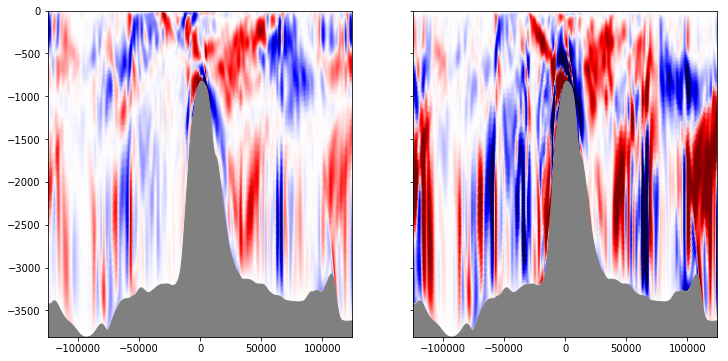

In [9]:
it = 100
pb = pp + pbar[:,:,None]
toplot = (pp-pp.mean(axis=0))*ww
toplob = (pb-pb.mean(axis=0))*ww

wmin, wmax = np.array([-1,1])*2*toplot.std()

fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

lims = [topo.min(), 0]

hpc = axs[0].pcolormesh(xx[None,:], zr.T, toplot[it,:,:].T, cmap="seismic", vmin=wmin \
                            , vmax=wmax, shading="gouraud"); 
hpc = axs[1].pcolormesh(xx[None,:], zr.T, toplob[it,:,:].T, cmap="seismic", vmin=wmin \
                            , vmax=wmax, shading="gouraud"); 
for ax in axs:
    ax.set_ylim(lims)
    ax.fill_between(xx,lims[0],topo,color="grey")

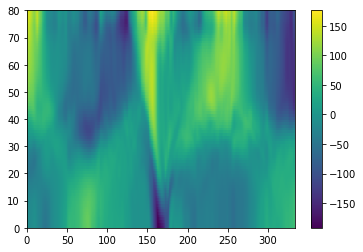

In [16]:
toplot = pp - pp.mean(axis=0)
plt.pcolormesh(toplot[it,:,:].T); plt.colorbar()

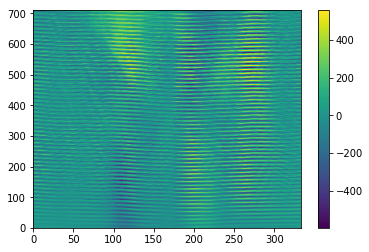

In [46]:
plt.pcolormesh(pbar-pbar.mean(axis=0)); plt.colorbar()

In [42]:
zr

array([[ -3.41002344e+03,  -3.38460986e+03,  -3.35448779e+03, ...,
         -9.64293289e+00,  -5.47413635e+00,  -1.66681123e+00],
       [ -3.40802979e+03,  -3.38263013e+03,  -3.35252490e+03, ...,
         -9.64181900e+00,  -5.47363758e+00,  -1.66669786e+00],
       [ -3.40842993e+03,  -3.38302759e+03,  -3.35291895e+03, ...,
         -9.64205742e+00,  -5.47374535e+00,  -1.66672122e+00],
       ..., 
       [ -3.60667310e+03,  -3.57987524e+03,  -3.54807544e+03, ...,
         -9.74386406e+00,  -5.51489449e+00,  -1.66992283e+00],
       [ -3.60562378e+03,  -3.57883325e+03,  -3.54704248e+03, ...,
         -9.74321938e+00,  -5.51456642e+00,  -1.66979134e+00],
       [ -3.60487842e+03,  -3.57809326e+03,  -3.54630859e+03, ...,
         -9.74271965e+00,  -5.51429176e+00,  -1.66965663e+00]], dtype=float32)